In [1]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv("../data/processed/health_misinfo_clean_100k.csv")
df.shape


(99200, 2)

In [3]:
X = df["text"].astype(str)
y = df["label"]

vectorizer = TfidfVectorizer(
    max_features=30000,
    stop_words="english",
    ngram_range=(1,2),
    min_df=3,
    max_df=0.95
)

X_vec = vectorizer.fit_transform(X)
X_vec.shape


(99200, 3396)

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X_vec, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [5]:
base_lr = LogisticRegression(
    max_iter=4000,
    class_weight="balanced",
    n_jobs=-1
)

lr_model = CalibratedClassifierCV(
    estimator=base_lr,
    method="sigmoid",
    cv=3
)

lr_model.fit(X_tr, y_tr)


C:\Users\bhanu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
C:\Users\bhanu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
C:\Users\bhanu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"estimator estimator: estimator instance, default=NoneThe classifier whose output need to be calibrated to provide moreaccurate `predict_proba` outputs. The default classifier isa :class:`~sklearn.svm.LinearSVC`... versionadded:: 1.2","LogisticRegre...00, n_jobs=-1)"
,"method method: {'sigmoid', 'isotonic', 'temperature'}, default='sigmoid'The method to use for calibration. Can be:- 'sigmoid', which corresponds to Platt's method (i.e. a binary logistic regression model).- 'isotonic', which is a non-parametric approach.- 'temperature', temperature scaling.Sigmoid and isotonic calibration methods natively support only binaryclassifiers and extend to multi-class classification using a One-vs-Rest (OvR)strategy with post-hoc renormalization, i.e., adjusting the probabilities aftercalibration to ensure they sum up to 1.In contrast, temperature scaling naturally supports multi-class calibration byapplying `softmax(classifier_logits/T)` with a value of `T` (temperature)that optimizes the log loss.For very uncalibrated classifiers on very imbalanced datasets, sigmoidcalibration might be preferred because it fits an additional interceptparameter. This helps shift decision boundaries appropriately when theclassifier being calibrated is biased towards the majority class.Isotonic calibration is not recommended when the number of calibration samplesis too low ``(≪1000)`` since it then tends to overfit... versionchanged:: 1.8 Added option 'temperature'.",'sigmoid'
,"cv cv: int, cross-validation generator, or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. If ``y`` isneither binary nor multiclass, :class:`~sklearn.model_selection.KFold`is used.Refer to the :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors.Base estimator clones are fitted in parallel across cross-validationiterations.See :term:`Glossary ` for more details... versionadded:: 0.24",None
,"ensemble ensemble: bool, or ""auto"", default=""auto""Determines how the calibrator is fitted.""auto"" will use `False` if the `estimator` is a:class:`~sklearn.frozen.FrozenEstimator`, and `True` otherwise.If `True`, the `estimator` is fitted using training data, andcalibrated using testing data, for each `cv` fold. The final estimatoris an ensemble of `n_cv` fitted classifier and calibrator pairs, where`n_cv` is the number of cross-validation folds. The output is theaverage predicted probabilities of all pairs.If `False`, `cv` is used to compute unbiased predictions, via:func:`~sklearn.model_selection.cross_val_predict`, which are thenused for calibration. At prediction time, the classifier used is the`estimator` trained on all the data.Note that this method is also internally implemented in:mod:`sklearn.svm` estimators with the `probabilities=True` parameter... versionadded:: 0.24.. versionchanged:: 1.6 `""auto""` option is added and is the default.",'auto'
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. depr

In [6]:
pred_lr = lr_model.predict(X_te)

print(classification_report(y_te, pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_te, pred_lr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9920
           1       1.00      1.00      1.00      9920

    accuracy                           1.00     19840
   macro avg       1.00      1.00      1.00     19840
weighted avg       1.00      1.00      1.00     19840

Confusion Matrix:
[[9920    0]
 [   0 9920]]


In [7]:
joblib.dump(lr_model, "../model_artifacts/model_logistic_regression.pkl")
joblib.dump(vectorizer, "../model_artifacts/vectorizer.pkl")


['../model_artifacts/vectorizer.pkl']

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("../data/processed/health_misinfo_clean_100k.csv")

print("Dataset shape:", df.shape)
print("\nSample data:")
df.head(3)
# TF-IDF vectorization
vectorizer = TfidfVectorizer(
    max_features=30000,
    stop_words="english",
    ngram_range=(1, 2),
    min_df=3
)

X = vectorizer.fit_transform(df["text"])
y = df["label"]

print("\nTF-IDF shape:", X.shape)
print("Vocabulary size:", len(vectorizer.vocabulary_))


Dataset shape: (99200, 2)

Sample data:

TF-IDF shape: (99200, 3396)
Vocabulary size: 3396


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Train calibrated logistic regression
base_lr = LogisticRegression(
    max_iter=4000,
    class_weight="balanced",
    n_jobs=-1
)

model = CalibratedClassifierCV(base_lr, cv=3)
model.fit(X_train, y_train)

print("\nModel training completed")


Train shape: (79360, 3396)
Test shape: (19840, 3396)


C:\Users\bhanu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
C:\Users\bhanu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
C:\Users\bhanu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



Model training completed


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC-AUC  : 1.0

Confusion Matrix:
 [[9920    0]
 [   0 9920]]


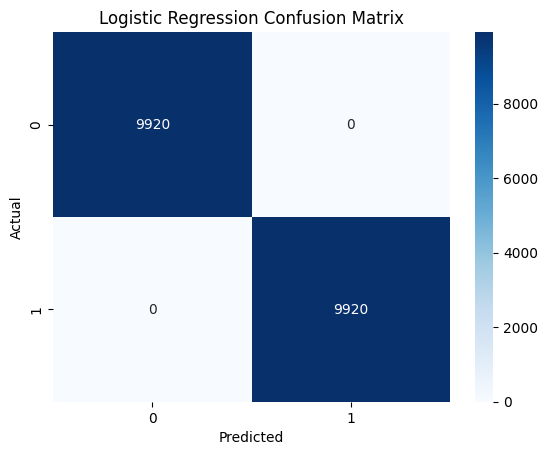

In [10]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall   :", round(recall_score(y_test, y_pred), 4))
print("F1 Score :", round(f1_score(y_test, y_pred), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_prob), 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [11]:
# Test input 1
text_1 = "Garlic cures cancer permanently"
X_1 = vectorizer.transform([text_1])

pred_1 = model.predict(X_1)[0]
prob_1 = model.predict_proba(X_1)[0][1]

print("INPUT:", text_1)
print("Prediction:", pred_1)
print("Misinformation Probability:", round(prob_1, 4))

print("\n" + "-"*60 + "\n")

# Test input 2 (changed input)
text_2 = "Clinical studies show treatment is effective"
X_2 = vectorizer.transform([text_2])

pred_2 = model.predict(X_2)[0]
prob_2 = model.predict_proba(X_2)[0][1]

print("INPUT:", text_2)
print("Prediction:", pred_2)
print("Misinformation Probability:", round(prob_2, 4))


INPUT: Garlic cures cancer permanently
Prediction: 1
Misinformation Probability: 0.9987

------------------------------------------------------------

INPUT: Clinical studies show treatment is effective
Prediction: 0
Misinformation Probability: 0.0
